In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def loss_func(theta, q, k, theta_wp=0., theta_star=1.):

    d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)

    return d_theta


def tau_exponential_model(t, delta_theta, theta_w, tau):
    return delta_theta * np.exp(-t / tau) + theta_w

def exponential_model(t, theta_0, z, ETmax, theta_star, theta_w, t_star=0.0):
    if theta_0 > theta_star:
        theta_0_ii = theta_star
    else:
        theta_0_ii = theta_0

    tau = z * (theta_star-theta_w)/ETmax
    return (theta_0_ii-theta_w) * np.exp(-(t-t_star) / tau) + theta_w

def q_model(t, k, q, theta_0, theta_star=1.0, theta_w=0.0, t_star=0.0):

    if theta_0 > theta_star:
        theta_0_ii = theta_star
    else:
        theta_0_ii = theta_0

    b = (theta_0_ii - theta_w) ** (1 - q)

    a = (1 - q) / ((theta_star - theta_w) ** q)

    return (-k * a * (t-t_star) + b) ** (1 / (1 - q)) + theta_w

def loss_func_sigmoid(theta, s50, k, Emax, theta_wp=0.):
    
    d_theta = (Emax + theta_wp) / (1 + np.exp(-k * (theta - s50)))
    
    return d_theta * -1

In [27]:
def loss_func_piecewise(theta, q, k, theta_wp=0., theta_star=0.8, theta_fc=1.):
    return np.where(theta - theta_star > 0, -k, -k * ( ( theta - theta_wp ) / (theta_star - theta_wp ) ) ** (q))

def q_model_piecewise(t, k, q, theta_0, theta_star=0.8, theta_w=0.0):
    
    t_star = (theta_0 - theta_star)/k # Time it takes from theta_0 to theta_star 

    return np.where(t_star > t, -k * t+theta_0, q_model(t, k, q, theta_0, theta_star, theta_w, np.maximum(t_star, 0)))

def exp_model_piecewise(t, theta_0, z, ETmax, theta_star, theta_w):
    k = ETmax/z
    t_star = (theta_0 - theta_star)/k
    return np.where(t_star > t, -k * t+theta_0, exponential_model(t, theta_0, z, ETmax, theta_star, theta_w, np.maximum(t_star, 0)))

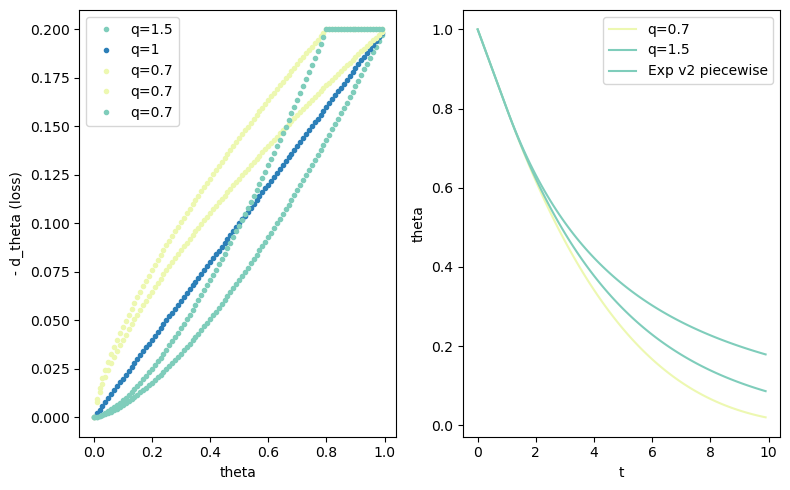

In [32]:
# Define variables 
theta = np.arange(0, 1, 0.01)
t = np.arange(0, 10, 0.1)

# Define parameters
k=1
q0 = 1
q1 = 1.5
q2 = 0.7
t0 = 0.1

theta_0 = 1
theta_star = 0.8
theta_w = 0

s50 = 0.5
Emax = 1
z = 50
ETmax = 10
tau = z * (theta_star-theta_w)/ETmax

k = ETmax/z
k_sigmoid = 20 # range b/w 2 to 20? 

fig = plt.figure(figsize=(8,5))

# Calculate & plot d_theta
d_theta = loss_func(theta, q=1.5, k=-1)

ax1 = fig.add_subplot(1,2,1)
# ax1.plot(theta, -1*loss_func_sigmoid(theta=theta, s50=s50, k=k_sigmoid, Emax=Emax), '.', label=f's50={s50}, k={k_sigmoid}', color="tab:grey", alpha=0.5)
ax1.plot(theta, -1*loss_func(theta=theta, q=q1, k=k), '.', label=f'q={q1}', color="#7fcdbb")
ax1.plot(theta, -1*loss_func(theta, q=q0, k=k), '.', label=f'q={q0}', color="#2c7fb8")
ax1.plot(theta, -1*loss_func(theta=theta, q=q2, k=k), '.', label=f'q={q2}', color="#edf8b1")
ax1.plot(theta, -1*loss_func_piecewise(theta=theta, q=q2, k=k), '.', label=f'q={q2}', color="#edf8b1")
ax1.plot(theta, -1*loss_func_piecewise(theta=theta, q=q1, k=k, theta_star=theta_star), '.', label=f'q={q2}', color="#7fcdbb")
ax1.set_xlabel("theta")
ax1.set_ylabel("- d_theta (loss)")
ax1.legend()

# Calculate & plot the drawdown
ax2 = fig.add_subplot(1,2,2)
# ax2.plot(t, q_model(t=t, q=q1, k=k, theta_0=1.0), '.', label=f'q={q1}', color="#7fcdbb")
# ax2.plot(t, tau_exponential_model(t,delta_theta=1.0, theta_w=0., tau=tau), '.', label=f'q={q0}')
# ax2.plot(t, exponential_model(t, theta_0=theta_0, z=z, ETmax=ETmax, theta_star=theta_star, theta_w=theta_w), 'o', label=f'Exp v2',alpha=0.3)
# ax2.plot(t, q_model(t=t, q=q2, k=k, theta_0=1.0), '.', label=f'q={q2}', color="#edf8b1")
ax2.plot(t, q_model_piecewise(t=t, q=q2, k=k, theta_0=1.0), '-', label=f'q={q2}', color="#edf8b1")
ax2.plot(t, q_model_piecewise(t=t, q=q1, k=k, theta_star=theta_star, theta_0=theta_0), '-', label=f'q={q1}', color="#7fcdbb")
ax2.plot(t, exp_model_piecewise(t, theta_0, z, ETmax, theta_star, theta_w), '-', label=f'Exp v2 piecewise', color="#7fcdbb")
ax2.set_xlabel("t")
ax2.set_ylabel("theta")
ax2.legend()
# ax2.set_ylim([0., 1])

fig.tight_layout()


In [29]:
t_star = (theta_0 - theta_star)/k
t_star

0.9999999999999998

In [30]:
k

0.2